# Assignment 2 2AMM10 2023-2024

## Group: [Shash_Kas_Pim]
### Member 1: [Shashank Prabhu]
### Member 2: [Kasra Gheytuli]
### Member 3: [Pim de Wildt]

We need to install some specific libraries. The cell below installs torch_geometric for torch 2.6.0+cu124. In case the current version of torch is different, check [here](https://pytorch-geometric.readthedocs.io/en/latest/install/installation.html) to see which versions (of both libraries) you should install. You might also need to install an old version of torch from [here](https://pytorch.org/get-started/previous-versions/)

**Note:** Do not install pyg_lib from the optional dependencies

In [1]:
!pip show torch

Name: torch
Version: 2.7.0+cu128
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: C:\Users\shash\OneDrive - TU Eindhoven\Shashank Prabhu University\Masters DSAI\Q4\2AMM10 Deep Learning\2AMM10-Assignments\venv\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: torchaudio, torchvision


In [2]:
# !pip install rdkit
# !pip install torch_geometric
# !pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.6.0+cu124.html

In [3]:
import pickle
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
import matplotlib.pyplot as plt

In [4]:
dir_add = 'ass2_data/'

with open(dir_add+'pos_data.pkl', 'rb') as f:
    pos_data = pickle.load(f)

with open(dir_add+'type_data.pkl', 'rb') as f:
    type_data = pickle.load(f)

with open(dir_add+'smiles.pkl', 'rb') as f:
    smiles_data = pickle.load(f)

data_split = np.load(dir_add+'data_split.npz')

train_idxes = data_split['train_idx']
test_idxes = data_split['test_idx']

formation_energy = np.load(dir_add+'formation_energy.npz')

fe = formation_energy['y'] # normalized formation energy
mu = formation_energy['mu']
std = formation_energy['sigma']

In [5]:
# shapes of lists
print("Length of data")
print(f"pos_data: {len(pos_data)}, type_data: {len(type_data)}, smiles: {len(smiles_data)}")
print("Idxes")
print(f"train: {len(train_idxes)}, test: {len(test_idxes)}, sum: {len(train_idxes) + len(test_idxes)}")

Length of data
pos_data: 129012, type_data: 129012, smiles: 129012
Idxes
train: 119012, test: 10000, sum: 129012


In [6]:
def at_number_to_atom_name(at_number):
    if at_number == 6:
        return 'C'
    elif at_number == 1:
        return 'H'
    elif at_number == 7:
        return 'N'
    elif at_number == 8:
        return 'O'
    elif at_number == 9:
        return 'F'
    elif at_number == 16:
        return 'S'
    else:
        return 'Unknown'

def inspect_structure(idx):
    smile = smiles_data[idx]
    pos = pos_data[idx]
    typ = type_data[idx]

    header = f"{'Atom':^5}│{'Number':^6}│{'x':^10}│{'y':^10}│{'z':^10}"
    line   = "─────┼──────┼──────────┼──────────┼──────────"
    print(header)
    print(line)

    for atom_num, (x, y, z) in zip(typ, pos):
        atom_sym = at_number_to_atom_name(atom_num)
        print(f"{atom_sym:^5}│{atom_num:^6}│{x:>10.3f}│{y:>10.3f}│{z:>10.3f}")
    print("")
    print("")
    print(f'SMILE: {smile}')
    print("")
    print("")
    print(f'Formation Energy: {fe[idx]*std + mu:.3f}')
    print(f'Formation Energy (normalized): {fe[idx]:.5f}')
    mol = Chem.MolFromSmiles(smile)
    if mol:
        # RDKit prefers 2‑D coordinates for nice depictions
        Chem.AllChem.Compute2DCoords(mol)
        img = Draw.MolToImage(mol, size=(300, 300))

        # Display with matplotlib (works both in notebooks and scripts)
        plt.figure(figsize=(3, 3))
        plt.axis('off')
        plt.imshow(img)
        plt.show()

Atom │Number│    x     │    y     │    z     
─────┼──────┼──────────┼──────────┼──────────
  C  │  6   │    -0.013│     1.086│     0.008
  H  │  1   │     0.002│    -0.006│     0.002
  H  │  1   │     1.012│     1.464│     0.000
  H  │  1   │    -0.541│     1.447│    -0.877
  H  │  1   │    -0.524│     1.438│     0.906


SMILE: C


Formation Energy: -17.172
Formation Energy (normalized): 5.72327


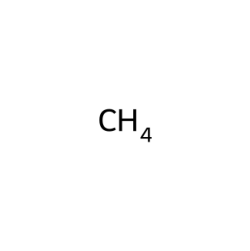

In [7]:
# methane
# Note how methane has a relatively high formation energy (compared to QM9)
# This correlates with lower thermodynamic stability and higher reactivity
# For example, methane readily burns in oxygen (CH₄ + 2O₂ → CO₂ + 2H₂O)
inspect_structure(0)

Atom │Number│    x     │    y     │    z     
─────┼──────┼──────────┼──────────┼──────────
  C  │  6   │    -0.105│     1.546│     0.074
  C  │  6   │     0.005│     0.044│    -0.019
  C  │  6   │    -0.058│    -0.572│    -1.213
  C  │  6   │     0.015│    -1.994│    -1.525
  C  │  6   │    -0.272│    -3.039│    -0.739
  C  │  6   │    -0.803│    -2.995│     0.668
  C  │  6   │    -0.121│    -2.035│     1.635
  N  │  7   │     1.277│    -1.676│     1.413
  C  │  6   │     0.228│    -0.626│     1.293
  H  │  1   │     0.801│     1.985│     0.512
  H  │  1   │    -0.266│     2.002│    -0.906
  H  │  1   │    -0.938│     1.842│     0.726
  H  │  1   │    -0.147│     0.074│    -2.085
  H  │  1   │     0.323│    -2.214│    -2.546
  H  │  1   │    -0.148│    -4.033│    -1.160
  H  │  1   │    -1.872│    -2.734│     0.654
  H  │  1   │    -0.751│    -4.003│     1.097
  H  │  1   │    -0.435│    -2.191│     2.669
  H  │  1   │     1.768│    -1.574│     2.297
  H  │  1   │     0.166│     0.066

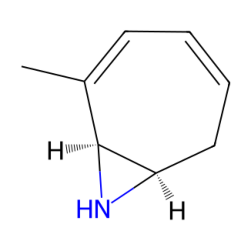

In [8]:
# random structure
inspect_structure(np.random.choice(range(len(smiles_data))))

## Task 1

In [9]:
import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing, global_mean_pool
from torch_geometric.data import Data, DataLoader as GeometricDataLoader
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import Ridge

import numpy as np
import pickle
import time
import math
import os

from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit import RDLogger
import rdkit.DataStructs as DataStructs
RDLogger.DisableLog('rdApp.*')

import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm.auto import tqdm

### GNN

In [10]:
#GNN

class GNNMessagePassing(MessagePassing):
    """
    Message passing layer that updates node features by:
    h_i = UPDATE(old_h_i, mean(messages from neighbors))

    where:
    - message = EDGE_FUNC(h_i, h_j, edge_features)  
    - h_i = atom i's features
    - EDGE_FUNC = MLP processing atom pair + bond distance (implemented in 'message' function)
    
    (Ref lec 3)
    """
    def __init__(self, node_dim, edge_dim, hidden_dim):
        super().__init__(aggr='mean') # Using mean aggregation for stability
        
        # Edge transfer function
        self.edge_mlp = nn.Sequential(
            nn.Linear(2 * node_dim + edge_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        
        # Node update function
        self.node_mlp = nn.Sequential(
            nn.Linear(node_dim + hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, node_dim)
        )
        
        self.layer_norm = nn.LayerNorm(node_dim)
        
    def forward(self, x, edge_index, edge_attr):
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)
    
    def message(self, x_i, x_j, edge_attr):
        edge_input = torch.cat([x_i, x_j, edge_attr], dim=-1)
        return self.edge_mlp(edge_input)
    
    def update(self, aggr_out, x):
        node_input = torch.cat([x, aggr_out], dim=-1)
        h = self.node_mlp(node_input)
        return self.layer_norm(h + x)  # Skip connection + norm


class MolecularGNN(nn.Module):
    """
    Complete GNN architecture for molecular property prediction.
    it respects molecular symmetries through distance based features
    """
    def __init__(self, num_atom_types=20, hidden_dim=128, num_layers=3):
        super().__init__()
        
        self.atom_embedding = nn.Embedding(num_atom_types, hidden_dim)
        self.input_projection = nn.Linear(hidden_dim + 3, hidden_dim)
        
        self.mp_layers = nn.ModuleList([
            GNNMessagePassing(hidden_dim, 1, hidden_dim)
            for _ in range(num_layers)
        ])
        
        self.output_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, 1)
        )
        
    def compute_edge_features(self, pos, edge_index): 
        # For invariance - bond length remains invariant under rotation and translation invarance as ditance is invariant under translation
        """Compute rotation-invariant distance features"""
        row, col = edge_index
        distances = torch.norm(pos[row] - pos[col], dim=1, keepdim=True)
        return distances
    
    def forward(self, batch_data):
        x = batch_data.x
        pos = batch_data.pos
        edge_index = batch_data.edge_index
        batch = batch_data.batch
        
        # Embed atoms and combine with positions
        atom_features = self.atom_embedding(x)
        node_features = torch.cat([atom_features, pos], dim=-1)
        node_features = self.input_projection(node_features)
        
        # Compute edge features
        edge_features = self.compute_edge_features(pos, edge_index)
        
        # Message passing with skip connections
        for i, mp_layer in enumerate(self.mp_layers):
            if i > 0:
                node_features = node_features + mp_layer(node_features, edge_index, edge_features)
            else:
                node_features = mp_layer(node_features, edge_index, edge_features)
        
        # Global pooling
        graph_features = global_mean_pool(node_features, batch)
        
        return self.output_mlp(graph_features)

In [11]:
# Data pre proocessing (to add edges for a geometric representation)

def create_molecular_graph(positions, atom_types, threshold=2.5): #2.5 Angstroms is a common threshold for covalent bonds
    """
    Create PyTorch Geometric graph from molecular data - connects atoms within threshold distance (as they are 'floating' in space).
    """
    num_atoms = len(atom_types)
    positions = np.array(positions)
    
    # Create edges based on distance
    edges = []
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            dist = np.linalg.norm(positions[i] - positions[j])
            if dist < threshold:
                edges.append([i, j])
                edges.append([j, i])
    
    # Fallback: fully connected if no edges (not ideal for realism but ensures connectivity)
    if not edges:
        edges = [[i, j] for i in range(num_atoms) for j in range(num_atoms) if i != j]
    
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    
    return Data(
        x=torch.tensor(atom_types, dtype=torch.long),
        pos=torch.tensor(positions, dtype=torch.float),
        edge_index=edge_index
    )


#Dataset class and loaders

class GeometricDataset(Dataset):
    """PyTorch dataset for geometric molecular data"""
    def __init__(self, pos_data, type_data, targets, indices, threshold=2.5):
        self.graphs = []
        print(f"Creating {len(indices)} molecular graphs with threshold={threshold}...")
        for idx in tqdm(indices):
            graph = create_molecular_graph(pos_data[idx], type_data[idx], threshold)
            graph.y = torch.tensor([targets[idx]], dtype=torch.float)
            self.graphs.append(graph)
    
    def __len__(self):
        return len(self.graphs)
    
    def __getitem__(self, idx):
        return self.graphs[idx]


### SMILES

In [12]:
# SMILES PREPROCESSING AND TOKENIZATION

def build_char_vocab(smiles_list):
    """Build character-level vocabulary from SMILES strings"""
    chars = sorted({c for smi in smiles_list for c in smi})
    char2idx = {'<PAD>': 0, '<UNK>': 1}
    char2idx.update({c: i+2 for i, c in enumerate(chars)})
    idx2char = {idx: char for char, idx in char2idx.items()}
    return char2idx, idx2char

def tokenize_smiles(smi, char2idx, max_len):
    """Convert SMILES string to padded sequence of character indices"""
    indices = [char2idx.get(c, char2idx['<UNK>']) for c in smi]
    length = min(len(indices), max_len)
    
    # Pad or truncate to max_len
    if len(indices) < max_len:
        indices = indices + [char2idx['<PAD>']] * (max_len - len(indices))
    else:
        indices = indices[:max_len]
    
    return indices, length

def smiles_to_fp(smi, radius=2, nBits=2048):
    """Convert SMILES to Morgan fingerprint (for future use)"""
    arr = np.zeros((nBits,), dtype=np.uint8)
    mol = Chem.MolFromSmiles(smi)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)
        rdkit.DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Build vocabulary from training data
train_smiles = [smiles_data[i] for i in train_idxes]
char2idx, idx2char = build_char_vocab(train_smiles)
vocab_size = len(char2idx)
max_len = max(len(smi) for smi in smiles_data)

print(f"Vocabulary size: {vocab_size}")
print(f"Max sequence length: {max_len}")
print(f"Sample characters: {list(char2idx.keys())[:20]}")

Vocabulary size: 26
Max sequence length: 62
Sample characters: ['<PAD>', '<UNK>', '#', '(', ')', '+', '-', '/', '1', '2', '3', '4', '5', '=', '@', 'C', 'F', 'H', 'N', 'O']


In [13]:
# LSTM MODEL FOR SMILES
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class ImprovedLSTM(nn.Module):
    """
    LSTM-based model for SMILES sequence processing.
    Handles variable-length sequences with proper padding and packing.
    """
    def __init__(self, vocab_size, emb_dim=64, hidden_dim=128, num_layers=2, dropout=0.1):
        super().__init__()
        
        # Character embedding layer
        self.embedding = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        
        # LSTM layers
        self.lstm = nn.LSTM(
            emb_dim, hidden_dim, num_layers,
            batch_first=True, 
            dropout=dropout if num_layers > 1 else 0.0,
            bidirectional=False
        )
        
        # Regularization and output
        self.dropout = nn.Dropout(dropout)
        self.layer_norm = nn.LayerNorm(hidden_dim)
        self.fc = nn.Linear(hidden_dim, 1)
        
    def forward(self, seq, lengths=None):
        """
        Forward pass through LSTM
        Args:
            seq: (batch_size, seq_len) - tokenized SMILES
            lengths: (batch_size,) - actual lengths before padding
        """
        # Embed characters
        x = self.embedding(seq)  # (batch_size, seq_len, emb_dim)
        
        # Pack sequences for efficient LSTM processing
        if lengths is not None:
            x = pack_padded_sequence(x, lengths.cpu(), batch_first=True, enforce_sorted=True)
        
        # LSTM forward pass
        lstm_out, (h_n, _) = self.lstm(x)
        
        if lengths is not None:
            lstm_out, _ = pad_packed_sequence(lstm_out, batch_first=True)
        
        # Use final hidden state from last layer
        last_hidden = h_n[-1]  # (batch_size, hidden_dim)
        
        # Apply normalization and dropout
        out = self.layer_norm(last_hidden)
        out = self.dropout(out)
        
        return self.fc(out).squeeze(-1)

In [14]:
# SMILES DATASET CLASS
class SMILESDataset(Dataset):
    """PyTorch dataset for SMILES molecular data"""
    def __init__(self, smiles_data, targets, indices, char2idx, max_len):
        self.sequences = []
        self.lengths = []
        self.targets = []
        
        print(f"Processing {len(indices)} SMILES sequences...")
        for idx in tqdm(indices, desc="Tokenizing SMILES"):
            smi = smiles_data[idx]
            seq, length = tokenize_smiles(smi, char2idx, max_len)
            
            self.sequences.append(seq)
            self.lengths.append(length)
            self.targets.append(targets[idx])
        
        # Convert to tensors
        self.sequences = torch.tensor(self.sequences, dtype=torch.long)
        self.lengths = torch.tensor(self.lengths, dtype=torch.long) 
        self.targets = torch.tensor(self.targets, dtype=torch.float)
    
    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, idx):
        return self.sequences[idx], self.lengths[idx], self.targets[idx]

def smiles_collate_fn(batch):
    """Custom collate function for SMILES data - sorts by length for packing"""
    sequences, lengths, targets = zip(*batch)
    
    # Sort by length (descending) for efficient packing
    sorted_batch = sorted(zip(sequences, lengths, targets), 
                         key=lambda x: x[1], reverse=True)
    sequences, lengths, targets = zip(*sorted_batch)
    
    return (torch.stack(sequences), 
            torch.tensor(lengths), 
            torch.stack(targets))

### COMMON

##### --------------------------------------- PART OF Q2 ---------------------------------------

In [ ]:
def compute_kendall_tau_metric(targets, predictions, std_val, mu_val):
    """Kendall's tau - ranking correlation for smaller samples"""
    from scipy.stats import kendalltau
    tau, _ = kendalltau(targets, predictions)
    return tau, "Kendall τ"

def compute_relative_rmse_metric(targets, predictions, std_val, mu_val):
    """RMSE as percentage of target range"""
    rmse_norm = np.sqrt(mean_squared_error(targets, predictions))
    rmse_unnorm = rmse_norm * std_val
    target_range = (targets * std_val + mu_val).max() - (targets * std_val + mu_val).min()
    relative_rmse = (rmse_unnorm / target_range) * 100
    return relative_rmse, "Rel. RMSE %"

EFFICIENCY_METRIC_CONFIG = {
    'metric1': compute_relative_rmse_metric,
    'metric2': compute_kendall_tau_metric,
}

#this has been commented in Q2 as well so it can be seen there but its needed here due to scope of eval func

##### ^^--------------------------------------- PART OF Q2 ---------------------------------------^^

In [ ]:
# TRAINING AND EVALUATION FUNCTIONS

def train_epoch(model, loader, optimizer, criterion, device, model_type='gnn'):
    """Train model for one epoch"""
    model.train()
    total_loss = 0
    
    desc = f"Training {model_type.upper()} batches"
    for batch in tqdm(loader, desc=desc, leave=False):
        if model_type == 'gnn':
            batch = batch.to(device)
            outputs = model(batch)
            targets = batch.y.view(-1, 1)
        else:  # SMILES
            sequences, lengths, targets = batch
            sequences = sequences.to(device)
            lengths = lengths.to(device)
            targets = targets.to(device).view(-1, 1)
            outputs = model(sequences, lengths=lengths).view(-1, 1)
        
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(loader)



## MODIFIED TO WORK WITH Q2 AS WELL ##

def evaluate(model, loader, criterion, device, model_type='gnn', use_custom_metrics=False):
    """Evaluate model on dataset and return metrics"""

    model.eval()
    total_loss = 0
    predictions = []
    targets_list = []
    
    with torch.no_grad():
        for batch in loader:
            if model_type == 'gnn':
                batch = batch.to(device)
                outputs = model(batch)
                targets = batch.y
            else: # SMILES
                sequences, lengths, targets = batch
                sequences = sequences.to(device)
                lengths = lengths.to(device)
                targets = targets.to(device)
                outputs = model(sequences, lengths=lengths)
            
            loss = criterion(outputs.view(-1), targets.view(-1))
            total_loss += loss.item()
            
            predictions.extend(outputs.cpu().numpy())
            targets_list.extend(targets.cpu().numpy())
    
    predictions = np.array(predictions).flatten()  # Ensure 1D
    targets_list = np.array(targets_list).flatten()  # Ensure 1D

    results = {'loss': total_loss / len(loader)}

    if use_custom_metrics:
        # Custom metrics for Task 2
        for metric_name, metric_func in EFFICIENCY_METRIC_CONFIG.items():
            try:
                value, unit = metric_func(targets_list, predictions, std, mu)
                results[metric_name] = {
                    'value': value,
                    'unit': unit,
                    'name': metric_func.__name__.replace('compute_', '').replace('_metric', '')
                }
            except Exception as e:
                print(f"Warning: Could not compute {metric_name}: {e}")
                results[metric_name] = {
                    'value': np.nan,
                    'unit': 'Error',
                    'name': 'Error'
                }
    else:
        # Standard metrics for task 1
        mae_norm = mean_absolute_error(targets_list, predictions)
        mse_norm = mean_squared_error(targets_list, predictions)
        r2 = r2_score(targets_list, predictions)
    
        # Unnormalize
        mae_unnorm = mae_norm * std
        mse_unnorm = mse_norm * (std ** 2)

        results.update({
            'mae_norm': mae_norm,
            'mse_norm': mse_norm,
            'mae_unnorm': mae_unnorm,
            'mse_unnorm': mse_unnorm,
            'r2': r2,
        })

    results.update({
        'predictions': predictions,
        'targets': targets_list
    })
    
    return results

In [ ]:
#Helper
def generate_model_filename(config, model_type='gnn'):
    """Generate model filename based on hyperparameters and model type"""
    if model_type == 'gnn':
        return f"gnn_h{config['hidden_dim']}_l{config['num_layers']}_t{config['threshold']:.1f}_lr{config['lr']:.0e}_bs{config['batch_size']}_e{config['num_epochs']}.pt"
    else:  # SMILES
        return f"lstm_emb{config['emb_dim']}_h{config['hidden_dim']}_l{config['num_layers']}_lr{config['lr']:.0e}_bs{config['batch_size']}_e{config['num_epochs']}.pt"

In [17]:
def plot_results(results, config, model_type='gnn'):
    """Plot training/validation loss and true vs predicted scatter plot."""
    
    val_metrics = results['val_metrics']
    val_losses = [m['loss'] for m in val_metrics]
    test_results = results['test_results']
    
    
    # Pllot for loss curves
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Loss curves
    ax.plot(results['train_losses'], label='Train Loss', color='blue', linewidth=2)
    ax.plot(val_losses, label='Val Loss', color='orange', linewidth=2)
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('MSE Loss (normalized)', fontsize=12)
    ax.set_title(f'{model_type.upper()} Model - Training and Validation Loss', fontsize=14)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    
    final_train_loss = results['train_losses'][-1]
    final_val_loss = val_losses[-1]
    
    ax.text(0.02, 0.98, f'Final Train Loss: {final_train_loss:.4f}\nFinal Val Loss: {final_val_loss:.4f}', 
            transform=ax.transAxes, verticalalignment='top', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Prediction scatter plot
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

    # Unnormalized predictions
    targets_unnorm = test_results['targets'] * std + mu
    predictions_unnorm = test_results['predictions'] * std + mu
    
    ax1.scatter(targets_unnorm, predictions_unnorm, alpha=0.6, s=20)
    ax1.plot([targets_unnorm.min(), targets_unnorm.max()], 
             [targets_unnorm.min(), targets_unnorm.max()], 'r--', lw=2)
    ax1.set_xlabel('True Formation Energy (eV)')
    ax1.set_ylabel('Predicted Formation Energy (eV)')
    ax1.set_title(f'{model_type.upper()} Test Predictions (R² = {test_results["r2"]:.3f})')
    ax1.grid(True)
    
    plt.tight_layout()
    plt.show()

In [ ]:
def run_training(config, model_type='gnn', subset_indices=None, use_efficiency_metrics=False):
    """
    Unified training function that works for both Task 1 and Task 2
    """
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    np.random.seed(config['seed'])
    torch.manual_seed(config['seed'])
    if torch.cuda.is_available():
        torch.cuda.manual_seed(config['seed'])
    
    # Use subset indices if provided (Task 2), otherwise use full training set (Task 1)
    training_indices = subset_indices if subset_indices is not None else train_idxes

    # Split training data for validation
    val_split = config.get('val_split', 0.1)

    train_idx_split, val_idx_split = train_test_split(
        training_indices, test_size=val_split, random_state=config['seed']
    )
    
    task_name = f"Task 2 (subset size: {len(training_indices)})" if subset_indices is not None else "Task 1"
    print(f"\n{model_type.upper()} Data split for {task_name}:")
    print(f"Training: {len(train_idx_split)} molecules")
    print(f"Validation: {len(val_idx_split)} molecules")
    print(f"Test: {len(test_idxes)} molecules")

    print(f"TRAINING {model_type.upper()} MODEL")
    
    start = time.time()
    
    # Create datasets and loaders based on model type
    if model_type == 'gnn':
        train_dataset = GeometricDataset(pos_data, type_data, fe, train_idx_split, config['threshold'])
        val_dataset = GeometricDataset(pos_data, type_data, fe, val_idx_split, config['threshold'])
        test_dataset = GeometricDataset(pos_data, type_data, fe, test_idxes, config['threshold'])
        
        train_loader = GeometricDataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
        val_loader = GeometricDataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False)
        test_loader = GeometricDataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False)
        
        # Initialize GNN model
        model = MolecularGNN(
            num_atom_types=20, 
            hidden_dim=config['hidden_dim'], 
            num_layers=config['num_layers']
        ).to(device)
        
    else:  # SMILES
        train_dataset = SMILESDataset(smiles_data, fe, train_idx_split, char2idx, max_len)
        val_dataset = SMILESDataset(smiles_data, fe, val_idx_split, char2idx, max_len)
        test_dataset = SMILESDataset(smiles_data, fe, test_idxes, char2idx, max_len)
        
        train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], 
                                shuffle=True, collate_fn=smiles_collate_fn)
        val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], 
                              shuffle=False, collate_fn=smiles_collate_fn)
        test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], 
                                shuffle=False, collate_fn=smiles_collate_fn)
        
        # Initialize LSTM model
        model = ImprovedLSTM(
            vocab_size=vocab_size,
            emb_dim=config['emb_dim'],
            hidden_dim=config['hidden_dim'], 
            num_layers=config['num_layers'],
            dropout=config['dropout']
        ).to(device)
    
    print(f"Data loading time: {time.time() - start:.2f} seconds")
    print(f"{model_type.upper()} Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    
    # Setup optimizer and scheduler
    weight_decay = config.get('weight_decay', 0)
    optimizer = torch.optim.Adam(model.parameters(), lr=config['lr'], weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=config['scheduler_patience'], factor=config['scheduler_factor'])
    criterion = nn.MSELoss()

    # Training loop
    best_val_loss = float('inf')
    train_losses = []
    val_metrics = []
    
    start = time.time()
    for epoch in range(config['num_epochs']):
        # Train
        train_loss = train_epoch(model, train_loader, optimizer, criterion, device, model_type)
        
        # Validate
        val_results = evaluate(model, val_loader, criterion, device, model_type, use_custom_metrics=use_efficiency_metrics)
        
        # Store metrics
        train_losses.append(train_loss)
        val_metrics.append(val_results)
        
        # Learning rate scheduling
        scheduler.step(val_results['loss'])
        
        # Save best model
        if val_results['loss'] < best_val_loss:
            best_val_loss = val_results['loss']
            best_model_state = model.state_dict().copy()
            if not use_efficiency_metrics:  # Only save for task 1
                model_filename = generate_model_filename(config, model_type)
                torch.save(model.state_dict(), model_filename)
                print(f"Saved new best {model_type.upper()} model: {model_filename}")
        
        # Print progress
        if use_efficiency_metrics:
            if 'metric1' in val_results and 'metric2' in val_results:
                metric1_info = val_results['metric1']
                metric2_info = val_results['metric2']
                print(f"Epoch {epoch+1}: Loss={train_loss:.4f}, {metric1_info['name']}={metric1_info['value']:.3f}, {metric2_info['name']}={metric2_info['value']:.3f}")
            else:
                print(f"Epoch {epoch+1}: Loss={train_loss:.4f}, Val Loss={val_results['loss']:.4f}")
        else:        
            print(f"Epoch {epoch+1}/{config['num_epochs']}:")
            print(f"  Train Loss: {train_loss:.4f}, Val Loss: {val_results['loss']:.4f}")
            print(f"  Time elapsed: {time.time() - start:.2f} seconds")

    # Load best model and evaluate on test set
    model.load_state_dict(best_model_state)
    test_results = evaluate(model, test_loader, criterion, device, model_type, use_custom_metrics=use_efficiency_metrics)
    
    if use_efficiency_metrics:
        if 'metric1' in test_results and 'metric2' in test_results:
            metric1_info = test_results['metric1']
            metric2_info = test_results['metric2']
            print(f"Final Test: {metric1_info['name']}={metric1_info['value']:.3f} {metric1_info['unit']}, {metric2_info['name']}={metric2_info['value']:.3f} {metric2_info['unit']}")
        else:
            print(f"Final Test: Loss={test_results['loss']:.4f}")
    else:
        print(f"FINAL {model_type.upper()} TEST RESULTS")
        print(f"NORMALIZED METRICS:")
        print(f"  Test MAE: {test_results['mae_norm']:.4f}")
        print(f"  Test MSE: {test_results['mse_norm']:.4f}")
        print(f"  Test R^2:  {test_results['r2']:.4f}")
        print(f"\nUNNORMALIZED METRICS:")
        print(f"  Test MAE: {test_results['mae_unnorm']:.4f}")
        print(f"  Test MSE: {test_results['mse_unnorm']:.4f}")
        model_filename = generate_model_filename(config, model_type)
        print(f"\nModel saved as: {model_filename}")
    
    return {
        'train_losses': train_losses,
        'val_metrics': val_metrics,
        'test_results': test_results,
        'model_filename': generate_model_filename(config, model_type) if not use_efficiency_metrics else None,
        'epochs_trained': len(train_losses),
        'subset_size': len(training_indices) if subset_indices is not None else len(train_idxes)
    }

In [ ]:
CONFIG_GNN = {
        # MODEL ARCHITECTURE
        'hidden_dim': 64,
        'num_layers': 3,
        'threshold': 2.5,         # Distance threshold in Angstroms
        
        # TRAINING PARAMETERS
        'lr': 1e-3,               
        'batch_size': 32,         
        'num_epochs': 10,         
        'scheduler_patience': 10,
        'scheduler_factor': 0.5,  
        
        # OTHER
        'seed': 69,               
        'val_split': 0.1,        #10%
    }
    
    
CONFIG_SMILES = {
    # MODEL ARCHITECTURE
    'emb_dim': 64,            
    'hidden_dim': 128,        
    'num_layers': 2,          
    'dropout': 0.1,           
    
    # TRAINING PARAMETERS
    'lr': 1e-3,               
    'weight_decay': 1e-5,     # L2 regularization
    'batch_size': 64,         
    'num_epochs': 15,         
    'scheduler_patience': 5,  
    'scheduler_factor': 0.5,  
    
    # OTHER
    'seed': 69,               
    'val_split': 0.1,
}

Using device: cuda

GNN Data split for Task 1:
Training: 107110 molecules
Validation: 11902 molecules
Test: 10000 molecules
TRAINING GNN MODEL
Creating 107110 molecular graphs with threshold=2.5...


100%|██████████| 107110/107110 [01:11<00:00, 1505.16it/s]


Creating 11902 molecular graphs with threshold=2.5...


100%|██████████| 11902/11902 [00:07<00:00, 1587.35it/s]


Creating 10000 molecular graphs with threshold=2.5...


100%|██████████| 10000/10000 [00:06<00:00, 1666.64it/s]


Data loading time: 84.82 seconds
GNN Model parameters: 82,817


Saved new best GNN model: gnn_h64_l3_t2.5_lr1e-03_bs32_e2.pt
Epoch 1/2:
  Train Loss: 0.1484
  Val Loss: 0.0536
  Val MAE (norm): 0.1619, (unnorm): 1.6698
  Val MSE (norm): 0.0536, (unnorm): 5.6946
  Val R²: 0.9462
  Time elapsed: 48.41 seconds


Saved new best GNN model: gnn_h64_l3_t2.5_lr1e-03_bs32_e2.pt
Epoch 2/2:
  Train Loss: 0.0333
  Val Loss: 0.0276
  Val MAE (norm): 0.1165, (unnorm): 1.2016
  Val MSE (norm): 0.0276, (unnorm): 2.9323
  Val R²: 0.9723
  Time elapsed: 103.51 seconds
FINAL GNN TEST RESULTS
NORMALIZED METRICS:
  Test MAE: 0.1160
  Test MSE: 0.0264
  Test R²:  0.9738

UNNORMALIZED METRICS:
  Test MAE: 1.1959
  Test MSE: 2.8105

Model saved as: gnn_h64_l3_t2.5_lr1e-03_bs32_e2.pt
Model saved as: gnn_h64_l3_t2.5_lr1e-03_bs32_e2.pt


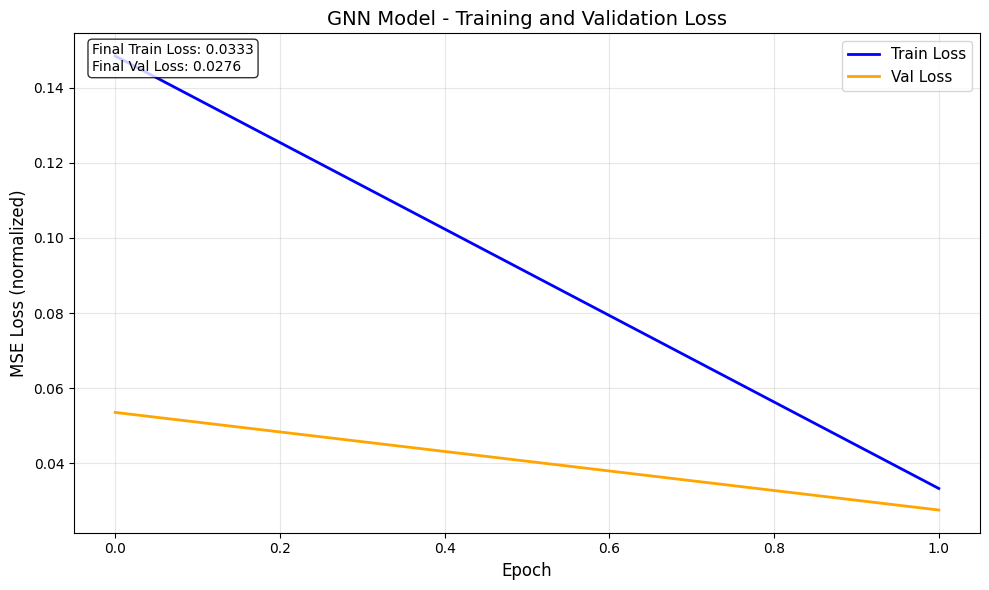

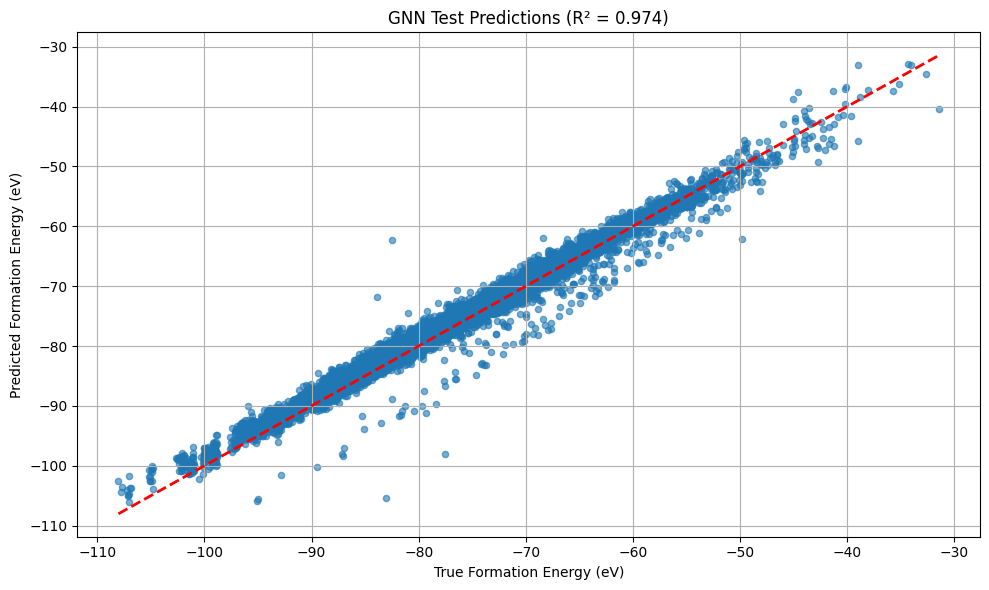

In [20]:
# # Run training with the configuration
results_GNN = run_training(CONFIG_GNN, 'gnn')
print(f"Model saved as: {results_GNN['model_filename']}")

# Plot results
plot_results(results_GNN, CONFIG_GNN, 'gnn')

Using device: cuda

SMILES Data split for Task 1:
Training: 107110 molecules
Validation: 11902 molecules
Test: 10000 molecules
TRAINING SMILES MODEL
Processing 107110 SMILES sequences...


Tokenizing SMILES: 100%|██████████| 107110/107110 [00:00<00:00, 265329.95it/s]


Processing 11902 SMILES sequences...


Tokenizing SMILES: 100%|██████████| 11902/11902 [00:00<00:00, 293977.46it/s]


Processing 10000 SMILES sequences...


Tokenizing SMILES: 100%|██████████| 10000/10000 [00:00<00:00, 250158.29it/s]


Data loading time: 0.96 seconds
SMILES Model parameters: 233,473


Saved new best SMILES model: lstm_emb64_h128_l2_lr1e-03_bs64_e2.pt
Epoch 1/2:
  Train Loss: 0.1280
  Val Loss: 0.0180
  Val MAE (norm): 0.0975, (unnorm): 1.0056
  Val MSE (norm): 0.0180, (unnorm): 1.9155
  Val R²: 0.9819
  Time elapsed: 38.53 seconds


Epoch 2/2:
  Train Loss: 0.0405
  Val Loss: 0.0269
  Val MAE (norm): 0.1390, (unnorm): 1.4329
  Val MSE (norm): 0.0269, (unnorm): 2.8621
  Val R²: 0.9730
  Time elapsed: 78.84 seconds
FINAL SMILES TEST RESULTS
NORMALIZED METRICS:
  Test MAE: 0.1384
  Test MSE: 0.0266
  Test R²:  0.9736

UNNORMALIZED METRICS:
  Test MAE: 1.4271
  Test MSE: 2.8320

Model saved as: lstm_emb64_h128_l2_lr1e-03_bs64_e2.pt
Model saved as: lstm_emb64_h128_l2_lr1e-03_bs64_e2.pt


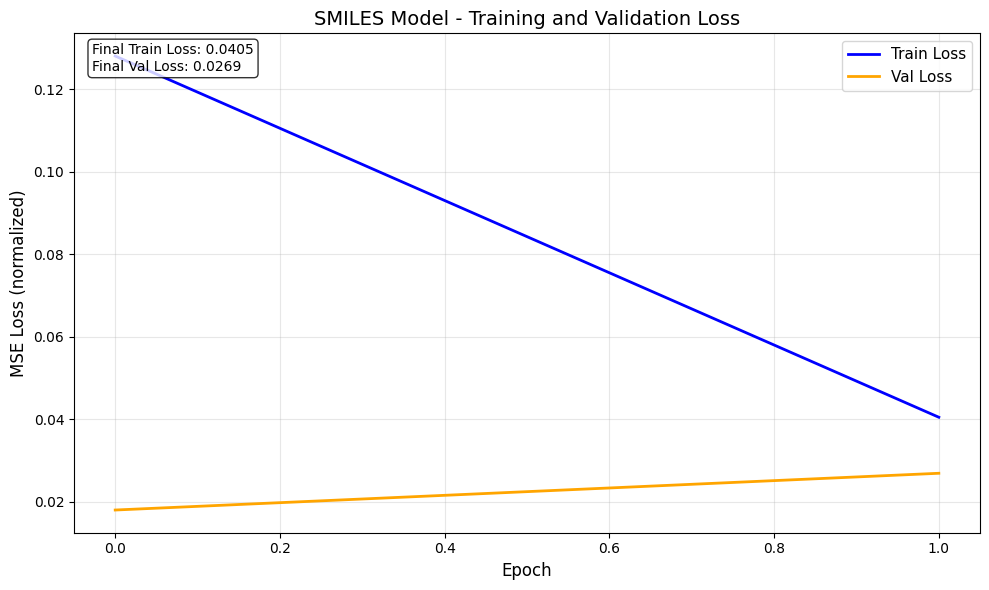

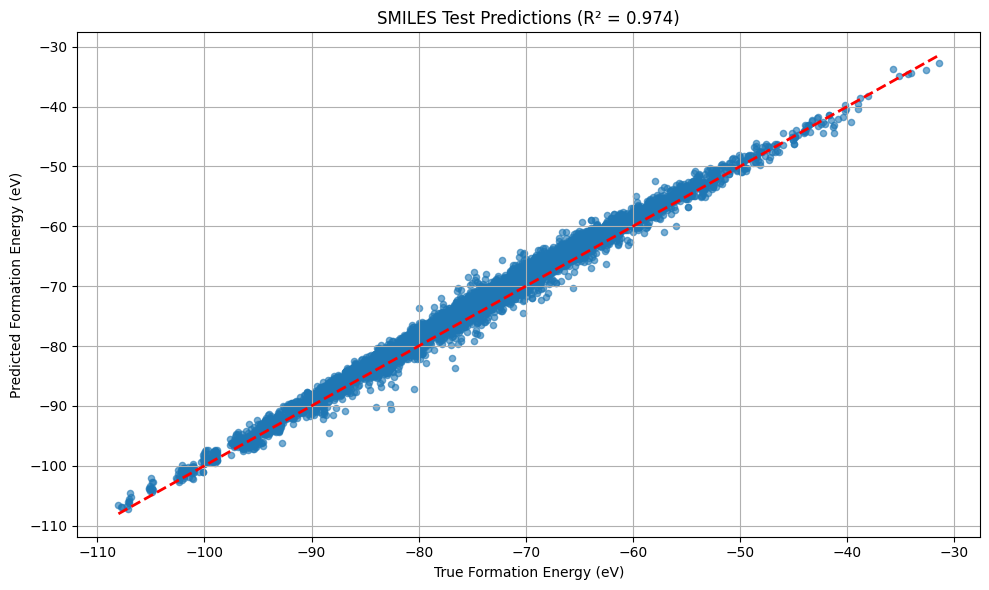

In [21]:
# # Run training with the configuration
results_SMILES = run_training(CONFIG_SMILES, 'smiles')
print(f"Model saved as: {results_SMILES['model_filename']}")

# Plot results
plot_results(results_SMILES, CONFIG_SMILES, 'smiles')

## Task 2

In [22]:
# These are the configurations for the data efficiency experiment. 
# But they are defined in Q1 because of the scope of evaluate function - it has been marked clearly that its part of Q2.


# def compute_kendall_tau_metric(targets, predictions, std_val, mu_val):
#     """Kendall's tau - ranking correlation for smaller samples"""
#     from scipy.stats import kendalltau
#     tau, _ = kendalltau(targets, predictions)
#     return tau, "Kendall τ"

# def compute_relative_rmse_metric(targets, predictions, std_val, mu_val):
#     """RMSE as percentage of target range"""
#     rmse_norm = np.sqrt(mean_squared_error(targets, predictions))
#     rmse_unnorm = rmse_norm * std_val
#     target_range = (targets * std_val + mu_val).max() - (targets * std_val + mu_val).min()
#     relative_rmse = (rmse_unnorm / target_range) * 100
#     return relative_rmse, "Rel. RMSE %"

# EFFICIENCY_METRIC_CONFIG = {
#     'metric1': compute_relative_rmse_metric,
#     'metric2': compute_kendall_tau_metric,
# }

In [23]:
# Get data subsets
def create_data_subsets(train_idxes, subset_sizes, seed=69):
    """Create random subsets of training data for efficiency analysis"""
    np.random.seed(seed)
    subsets = {}
    
    for size in subset_sizes:
        if size > len(train_idxes):
            print(f"Warning: Requested size {size} > available data {len(train_idxes)}")
            subsets[size] = train_idxes.copy()
        else:
            # Randomly sample without replacement
            subset_idx = np.random.choice(train_idxes, size=size, replace=False)
            subsets[size] = subset_idx
            
    return subsets

In [ ]:
def plot_data_efficiency_results(gnn_results, smiles_results, subset_sizes):
    """
    Plot data efficiency comparison between GNN and SMILES models using configured metrics
    """
    metric1_info = None
    metric2_info = None
    
    for size in subset_sizes:
        if gnn_results[size] is not None:
            metric1_info = gnn_results[size]['test_results']['metric1']
            metric2_info = gnn_results[size]['test_results']['metric2']
            break
        elif smiles_results[size] is not None:
            metric1_info = smiles_results[size]['test_results']['metric1']
            metric2_info = smiles_results[size]['test_results']['metric2']
            break
    
    if metric1_info is None or metric2_info is None:
        print("Error: No successful results found")
        return
    
    # Extract metrics for plotting
    gnn_metric1 = [gnn_results[size]['test_results']['metric1']['value'] if gnn_results[size] else np.nan 
                   for size in subset_sizes]
    gnn_metric2 = [gnn_results[size]['test_results']['metric2']['value'] if gnn_results[size] else np.nan 
                   for size in subset_sizes]
    
    smiles_metric1 = [smiles_results[size]['test_results']['metric1']['value'] if smiles_results[size] else np.nan 
                      for size in subset_sizes]
    smiles_metric2 = [smiles_results[size]['test_results']['metric2']['value'] if smiles_results[size] else np.nan 
                      for size in subset_sizes]
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot Metric 1
    ax1.plot(subset_sizes, gnn_metric1, 'o-', label='GNN', linewidth=2, markersize=8)
    ax1.plot(subset_sizes, smiles_metric1, 's-', label='SMILES', linewidth=2, markersize=8)
    ax1.set_xlabel('Training Set Size')
    ax1.set_ylabel(f"{metric1_info['name']} ({metric1_info['unit']})")
    ax1.set_title(f'Data Efficiency: {metric1_info["name"]}')
    ax1.set_xscale('log')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot Metric 2
    ax2.plot(subset_sizes, gnn_metric2, 'o-', label='GNN', linewidth=2, markersize=8)
    ax2.plot(subset_sizes, smiles_metric2, 's-', label='SMILES', linewidth=2, markersize=8)
    ax2.set_xlabel('Training Set Size')
    ax2.set_ylabel(f"{metric2_info['name']} ({metric2_info['unit']})")
    ax2.set_title(f'Data Efficiency: {metric2_info["name"]}')
    ax2.set_xscale('log')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary table
    print("\n Q2 MODEL EFFICIENCY SUMMARY")
    metric1_col = f"GNN {metric1_info['name']}"
    metric2_col = f"GNN {metric2_info['name']}"
    metric3_col = f"SMILES {metric1_info['name']}"
    metric4_col = f"SMILES {metric2_info['name']}"
    
    print(f"{'Size':<6} {metric1_col:<12} {metric2_col:<12} {metric3_col:<15} {metric4_col:<15}")
    print("-" * 70)
    
    for i, size in enumerate(subset_sizes):
        gnn_m1_val = f"{gnn_metric1[i]:.3f}" if not np.isnan(gnn_metric1[i]) else "N/A"
        gnn_m2_val = f"{gnn_metric2[i]:.3f}" if not np.isnan(gnn_metric2[i]) else "N/A"
        smiles_m1_val = f"{smiles_metric1[i]:.3f}" if not np.isnan(smiles_metric1[i]) else "N/A"
        smiles_m2_val = f"{smiles_metric2[i]:.3f}" if not np.isnan(smiles_metric2[i]) else "N/A"
        
        print(f"{size:<6} {gnn_m1_val:<12} {gnn_m2_val:<12} {smiles_m1_val:<15} {smiles_m2_val:<15}")
    
    print(f"\nMetrics: {metric1_info['name']} ({metric1_info['unit']}), {metric2_info['name']} ({metric2_info['unit']})")

In [ ]:
def run_data_efficiency_experiment(model_type='gnn', subset_sizes=[100, 300, 1000, 3000, 10000], config=CONFIG_GNN):
    """
    Run data efficiency experiment for given model type across different training set sizes
    """
    
    # Create data subsets
    data_subsets = create_data_subsets(train_idxes, subset_sizes, seed=69)
    
    # Store results for each subset size
    results = {}

    
    # Run experiment for each subset size
    for size in subset_sizes:
        print(f"\nTraining {model_type.upper()} with {size} molecules (subset size)")
        
        # Get subset indices
        subset_train_idx = data_subsets[size]
        
        try:
            # Run training with subset using the adapted function
            result = run_training(
                config=config, 
                model_type=model_type, 
                subset_indices=subset_train_idx,
                use_efficiency_metrics=True  # Use custom metrics for Task 2
            )
            results[size] = result
            
            # Print key metrics
            test_results = result['test_results']
            metric1_info = test_results['metric1']
            metric2_info = test_results['metric2']
            print(f"Size {size}: {metric1_info['name']}={metric1_info['value']:.3f} {metric1_info['unit']}, "
                  f"{metric2_info['name']}={metric2_info['value']:.3f} {metric2_info['unit']}")
            
        except Exception as e:
            print(f"Failed for size {size}: {e}")
            results[size] = None
    
    return results

In [ ]:
# Configs from the two modeles in Q1 will be used to run the data efficiency analysis
SUBSET_SIZES = [100, 300, 1000, 3000, 10000]


=== DATA EFFICIENCY EXPERIMENT: GNN ===

--- Training GNN with 100 molecules ---
Using device: cuda

GNN Data split for Task 2 (subset size: 100):
Training: 90 molecules
Validation: 10 molecules
Test: 10000 molecules
TRAINING GNN MODEL
Creating 90 molecular graphs with threshold=2.5...


  0%|          | 0/90 [00:00<?, ?it/s]

100%|██████████| 90/90 [00:00<00:00, 1062.52it/s]


Creating 10 molecular graphs with threshold=2.5...


100%|██████████| 10/10 [00:00<00:00, 966.38it/s]


Creating 10000 molecular graphs with threshold=2.5...


100%|██████████| 10000/10000 [00:08<00:00, 1241.56it/s]


Data loading time: 8.17 seconds
GNN Model parameters: 82,817


Epoch 1: Loss=0.8245, relative_rmse=30.997, kendall_tau=0.556


Epoch 2: Loss=0.5451, relative_rmse=25.274, kendall_tau=0.556
Final Test: relative_rmse=11.031 Rel. RMSE %, kendall_tau=0.648 Kendall τ
Size 100: relative_rmse=11.031 Rel. RMSE %, kendall_tau=0.648 Kendall τ

--- Training GNN with 300 molecules ---
Using device: cuda

GNN Data split for Task 2 (subset size: 300):
Training: 270 molecules
Validation: 30 molecules
Test: 10000 molecules
TRAINING GNN MODEL
Creating 270 molecular graphs with threshold=2.5...


100%|██████████| 270/270 [00:00<00:00, 1343.32it/s]


Creating 30 molecular graphs with threshold=2.5...


100%|██████████| 30/30 [00:00<00:00, 1251.83it/s]


Creating 10000 molecular graphs with threshold=2.5...


100%|██████████| 10000/10000 [00:06<00:00, 1457.96it/s]


Data loading time: 7.10 seconds
GNN Model parameters: 82,817


Epoch 1: Loss=0.8572, relative_rmse=19.070, kendall_tau=0.476


Epoch 2: Loss=0.4726, relative_rmse=16.104, kendall_tau=0.609
Final Test: relative_rmse=7.539 Rel. RMSE %, kendall_tau=0.722 Kendall τ
Size 300: relative_rmse=7.539 Rel. RMSE %, kendall_tau=0.722 Kendall τ

--- Training GNN with 1000 molecules ---
Using device: cuda

GNN Data split for Task 2 (subset size: 1000):
Training: 900 molecules
Validation: 100 molecules
Test: 10000 molecules
TRAINING GNN MODEL
Creating 900 molecular graphs with threshold=2.5...


100%|██████████| 900/900 [00:00<00:00, 1546.18it/s]


Creating 100 molecular graphs with threshold=2.5...


100%|██████████| 100/100 [00:00<00:00, 1473.24it/s]


Creating 10000 molecular graphs with threshold=2.5...


100%|██████████| 10000/10000 [00:06<00:00, 1485.16it/s]


Data loading time: 7.40 seconds
GNN Model parameters: 82,817


Epoch 1: Loss=0.4641, relative_rmse=7.882, kendall_tau=0.792


Epoch 2: Loss=0.1878, relative_rmse=7.481, kendall_tau=0.808
Final Test: relative_rmse=6.353 Rel. RMSE %, kendall_tau=0.775 Kendall τ
Size 1000: relative_rmse=6.353 Rel. RMSE %, kendall_tau=0.775 Kendall τ

=== DATA EFFICIENCY EXPERIMENT: SMILES ===

--- Training SMILES with 100 molecules ---
Using device: cuda

SMILES Data split for Task 2 (subset size: 100):
Training: 90 molecules
Validation: 10 molecules
Test: 10000 molecules
TRAINING SMILES MODEL
Processing 90 SMILES sequences...


Tokenizing SMILES: 100%|██████████| 90/90 [00:00<00:00, 90676.76it/s]


Processing 10 SMILES sequences...


Tokenizing SMILES: 100%|██████████| 10/10 [00:00<?, ?it/s]


Processing 10000 SMILES sequences...


Tokenizing SMILES: 100%|██████████| 10000/10000 [00:00<00:00, 207311.42it/s]


Data loading time: 0.10 seconds
SMILES Model parameters: 233,473


Epoch 1: Loss=1.0696, relative_rmse=35.344, kendall_tau=0.200


Epoch 2: Loss=0.9576, relative_rmse=39.358, kendall_tau=0.289
Final Test: relative_rmse=12.916 Rel. RMSE %, kendall_tau=0.247 Kendall τ
Size 100: relative_rmse=12.916 Rel. RMSE %, kendall_tau=0.247 Kendall τ

--- Training SMILES with 300 molecules ---
Using device: cuda

SMILES Data split for Task 2 (subset size: 300):
Training: 270 molecules
Validation: 30 molecules
Test: 10000 molecules
TRAINING SMILES MODEL
Processing 270 SMILES sequences...


Tokenizing SMILES: 100%|██████████| 270/270 [00:00<00:00, 268674.28it/s]


Processing 30 SMILES sequences...


Tokenizing SMILES: 100%|██████████| 30/30 [00:00<?, ?it/s]


Processing 10000 SMILES sequences...


Tokenizing SMILES: 100%|██████████| 10000/10000 [00:00<00:00, 257693.95it/s]


Data loading time: 0.09 seconds
SMILES Model parameters: 233,473


Epoch 1: Loss=1.1567, relative_rmse=19.430, kendall_tau=0.425


Epoch 2: Loss=0.7617, relative_rmse=17.788, kendall_tau=0.508
Final Test: relative_rmse=11.505 Rel. RMSE %, kendall_tau=0.349 Kendall τ
Size 300: relative_rmse=11.505 Rel. RMSE %, kendall_tau=0.349 Kendall τ

--- Training SMILES with 1000 molecules ---
Using device: cuda

SMILES Data split for Task 2 (subset size: 1000):
Training: 900 molecules
Validation: 100 molecules
Test: 10000 molecules
TRAINING SMILES MODEL
Processing 900 SMILES sequences...


Tokenizing SMILES: 100%|██████████| 900/900 [00:00<00:00, 289129.41it/s]


Processing 100 SMILES sequences...


Tokenizing SMILES: 100%|██████████| 100/100 [00:00<00:00, 99438.22it/s]


Processing 10000 SMILES sequences...


Tokenizing SMILES: 100%|██████████| 10000/10000 [00:00<00:00, 152054.58it/s]


Data loading time: 0.13 seconds
SMILES Model parameters: 233,473


Epoch 1: Loss=1.0376, relative_rmse=15.137, kendall_tau=0.375


Epoch 2: Loss=0.6581, relative_rmse=14.391, kendall_tau=0.414
Final Test: relative_rmse=11.016 Rel. RMSE %, kendall_tau=0.406 Kendall τ
Size 1000: relative_rmse=11.016 Rel. RMSE %, kendall_tau=0.406 Kendall τ


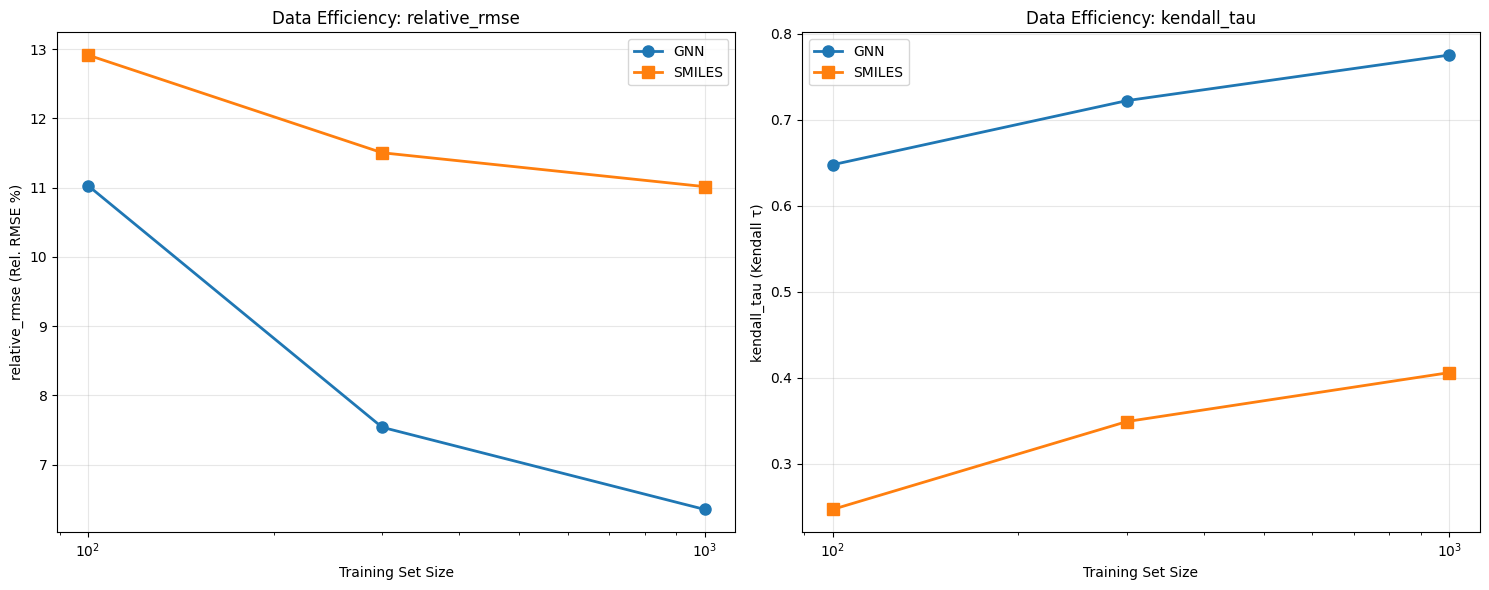


=== DATA EFFICIENCY SUMMARY ===
Size   GNN relative_rmse GNN kendall_tau SMILES relative_rmse SMILES kendall_tau
----------------------------------------------------------------------
100    11.031       0.648        12.916          0.247          
300    7.539        0.722        11.505          0.349          
1000   6.353        0.775        11.016          0.406          

Metrics: relative_rmse (Rel. RMSE %), kendall_tau (Kendall τ)


In [27]:
# Run Q2 experiment
# Run data efficiency experiments for both models
gnn_efficiency_results = run_data_efficiency_experiment('gnn', SUBSET_SIZES, CONFIG_GNN)
smiles_efficiency_results = run_data_efficiency_experiment('smiles', SUBSET_SIZES, CONFIG_SMILES)
plot_data_efficiency_results(gnn_efficiency_results, smiles_efficiency_results, SUBSET_SIZES)

## Task 3

In [28]:
def is_valid_smiles(smiles):
    if smiles is None:
        return False
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

def canonicalize(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return Chem.MolToSmiles(mol, canonical=True)
        return 'None'
    except:
        return 'None'

In [29]:
canonicalize("COO"), canonicalize("O(C)O")

('COO', 'COO')

In [30]:
is_valid_smiles("COO"), is_valid_smiles("O(C)O"), is_valid_smiles("C##")

(True, True, False)

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
from rdkit import Chem

In [ ]:
# ─── Build generation vocabulary ─────────────────────────────────────────────
gen_char2idx = dict(char2idx)
gen_char2idx['<SOS>'] = len(gen_char2idx)
gen_char2idx['<EOS>'] = len(gen_char2idx)
PAD = gen_char2idx['<PAD>']
SOS = gen_char2idx['<SOS>']
EOS = gen_char2idx['<EOS>']
gen_idx2char = {i:c for c,i in gen_char2idx.items()}
V = len(gen_char2idx)


Training SMILES language model:


 Ep 1/10  loss = 0.9633


 Ep 2/10  loss = 0.6451


 Ep 3/10  loss = 0.6027


 Ep 4/10  loss = 0.5812


 Ep 5/10  loss = 0.5686


 Ep 6/10  loss = 0.5596


KeyboardInterrupt: 

In [ ]:
# ─── Canonicalize training SMILES for novelty lookup ─────────────────────────
train_smiles_raw = [smiles_data[i] for i in train_idxes]
train_set = set()
for smi in train_smiles_raw:
    canon = canonicalize(smi)
    if canon != 'None':
        train_set.add(canon)

In [ ]:
# ─── Prepare next‐token sequences for the LM ─────────────────────────────────
sequences = []
for smi in train_smiles_raw:
    seq = [SOS] + [gen_char2idx.get(c, char2idx['<UNK>']) for c in smi] + [EOS]
    sequences.append(seq)
max_gen_len = max(len(s) for s in sequences)

inputs, targets = [], []
for seq in sequences:
    padded = seq + [PAD] * (max_gen_len - len(seq))
    inputs.append(padded[:-1])
    targets.append(padded[1:])
inputs  = torch.tensor(inputs,  dtype=torch.long)
targets = torch.tensor(targets, dtype=torch.long)

In [ ]:
# ─── Dataset & DataLoader ───────────────────────────────────────────────────
class LMDS(Dataset):
    def __init__(self, X, Y):
        self.X, self.Y = X, Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, i):
        return self.X[i], self.Y[i]

batch_size = 256
lm_loader = DataLoader(LMDS(inputs, targets),
                       batch_size=batch_size,
                       shuffle=True)

In [ ]:
# ─── Char‐level LSTM language model ──────────────────────────────────────────
class CharLSTM(nn.Module):
    def __init__(self, V, emb_dim=64, hid_dim=256, nlayers=2):
        super().__init__()
        self.emb  = nn.Embedding(V, emb_dim, padding_idx=PAD)
        self.lstm = nn.LSTM(emb_dim, hid_dim, num_layers=nlayers,
                            batch_first=True)
        self.fc   = nn.Linear(hid_dim, V)

    def forward(self, x):
        emb, _ = self.lstm(self.emb(x))
        return self.fc(emb)   # (B, T, V)

device   = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lm_model = CharLSTM(V).to(device)

optimizer = torch.optim.Adam(lm_model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss(ignore_index=PAD)

In [ ]:
# ─── Train the language model ────────────────────────────────────────────────
n_epochs = 10
print("\nTraining SMILES language model from scratch:")
for ep in range(1, n_epochs + 1):
    lm_model.train()
    total_loss = 0.0
    for Xb, Yb in tqdm(lm_loader, desc=f"Epoch {ep}", leave=False):
        Xb, Yb = Xb.to(device), Yb.to(device)
        logits = lm_model(Xb)                             # B×T×V
        loss   = criterion(logits.view(-1, V), Yb.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * Xb.size(0)
    avg = total_loss / len(lm_loader.dataset)
    print(f" Ep {ep}/{n_epochs}  loss = {avg:.4f}")

In [ ]:
# ─── Sampling function (returns raw SMILES) ─────────────────────────────────
def sample_smiles(model, max_len, temp=1.0):
    model.eval()
    seq = [SOS]
    with torch.no_grad():
        for _ in range(max_len):
            x      = torch.tensor([seq], device=device)
            logits = model(x)[0, -1] / temp
            probs  = F.softmax(logits, dim=-1)
            idx    = torch.multinomial(probs, 1).item()
            if idx == EOS:
                break
            seq.append(idx)
    return ''.join(gen_idx2char[i] for i in seq[1:])

In [ ]:
# ─── Generate and canonicalize 5000 molecules ────────────────────────────────
N = 5000
gen_canonical = []
print(f"\nSampling exactly {N} SMILES…")
for _ in tqdm(range(N), desc="Sampling 5K"):
    raw = sample_smiles(lm_model, max_len=max_gen_len, temp=1.0)
    if not is_valid_smiles(raw):
        continue
    canon = canonicalize(raw)
    if canon != 'None':
        gen_canonical.append(canon)

In [ ]:

# ─── Compute validity, uniqueness, novelty ──────────────────────────────────
valid_count  = len(gen_canonical)
validity     = valid_count / N
unique_valid = list(dict.fromkeys(gen_canonical))
uniqueness   = len(unique_valid) / valid_count
novel        = [s for s in unique_valid if s not in train_set]
novelty      = len(novel) / len(unique_valid)

print("\nTask 3 SMILES‐generation metrics:")
print(f"  Generated total : {N}")
print(f"  Validity        : {validity:.3f}   ({valid_count}/{N})")
print(f"  Uniqueness      : {uniqueness:.3f}   ({len(unique_valid)}/{valid_count})")
print(f"  Novelty         : {novelty:.3f}   ({len(novel)}/{len(unique_valid)})")

In [ ]:
# ─── Save the first 5000 unique valid canonical SMILES ───────────────────────
final_smiles = unique_valid[:5000]
with open('generated_5000.txt','w') as f:
    for s in final_smiles:
        f.write(s + "\n")
print("\nSaved 5000 unique valid SMILES to generated_5000.txt")